In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd 
import sklearn as sk
data = pd.read_csv('loan.csv')
data.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#drop col w more than 95 percantage of empty values 
data_new = data.dropna(thresh=data.shape[0]*0.95,how='all',axis=1)
data_new.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,RENT,55000.0,...,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,N,Cash,N
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,MORTGAGE,90000.0,...,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,N,Cash,N
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,MORTGAGE,59280.0,...,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,N,Cash,N
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,MORTGAGE,92000.0,...,100.0,0.0,0.0,385183.0,36151.0,5000.0,44984.0,N,Cash,N
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,MORTGAGE,57250.0,...,0.0,0.0,0.0,157548.0,29674.0,9300.0,32332.0,N,Cash,N


In [3]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 82 columns):
loan_amnt                     int64
funded_amnt                   int64
funded_amnt_inv               float64
term                          object
int_rate                      float64
installment                   float64
grade                         object
sub_grade                     object
home_ownership                object
annual_inc                    float64
verification_status           object
issue_d                       object
loan_status                   object
pymnt_plan                    object
purpose                       object
title                         object
zip_code                      object
addr_state                    object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line              object
inq_last_6mths                float64
open_acc                      float64
pub_rec                       

In [3]:
#find the cor btw grade and other variables including the category cariables
data_gr = data_new.assign(grade=data_new.grade.astype('category').cat.codes).corr()
data_gr.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
loan_amnt,1.000000,0.999755,0.999038,0.098083,0.945627,0.099604,0.197246,0.043542,-0.009277,-0.027840,...,-0.023500,-0.026761,0.089481,0.020816,-0.083562,0.007553,0.334985,0.276268,0.371526,0.208446
funded_amnt,0.999755,1.000000,0.999341,0.098099,0.945969,0.099435,0.197207,0.043745,-0.009173,-0.028132,...,-0.023501,-0.026761,0.089480,0.020814,-0.083447,0.007625,0.334985,0.276268,0.371530,0.208445
funded_amnt_inv,0.999038,0.999341,1.000000,0.098131,0.945119,0.098598,0.197025,0.044276,-0.009029,-0.030063,...,-0.023518,-0.026786,0.089505,0.020766,-0.083253,0.007773,0.335012,0.276270,0.371562,0.208450
int_rate,0.098083,0.098099,0.098131,1.000000,0.123947,0.952866,-0.050585,0.124497,0.058899,0.188399,...,0.033429,0.181663,-0.079370,0.271897,0.056666,0.013885,-0.123970,0.006908,-0.240067,-0.001642
installment,0.945627,0.945969,0.945119,0.123947,1.000000,0.115182,0.190270,0.044843,0.002053,-0.002392,...,-0.017056,-0.004151,0.070406,0.044043,-0.075076,0.014309,0.299004,0.258431,0.334982,0.191123


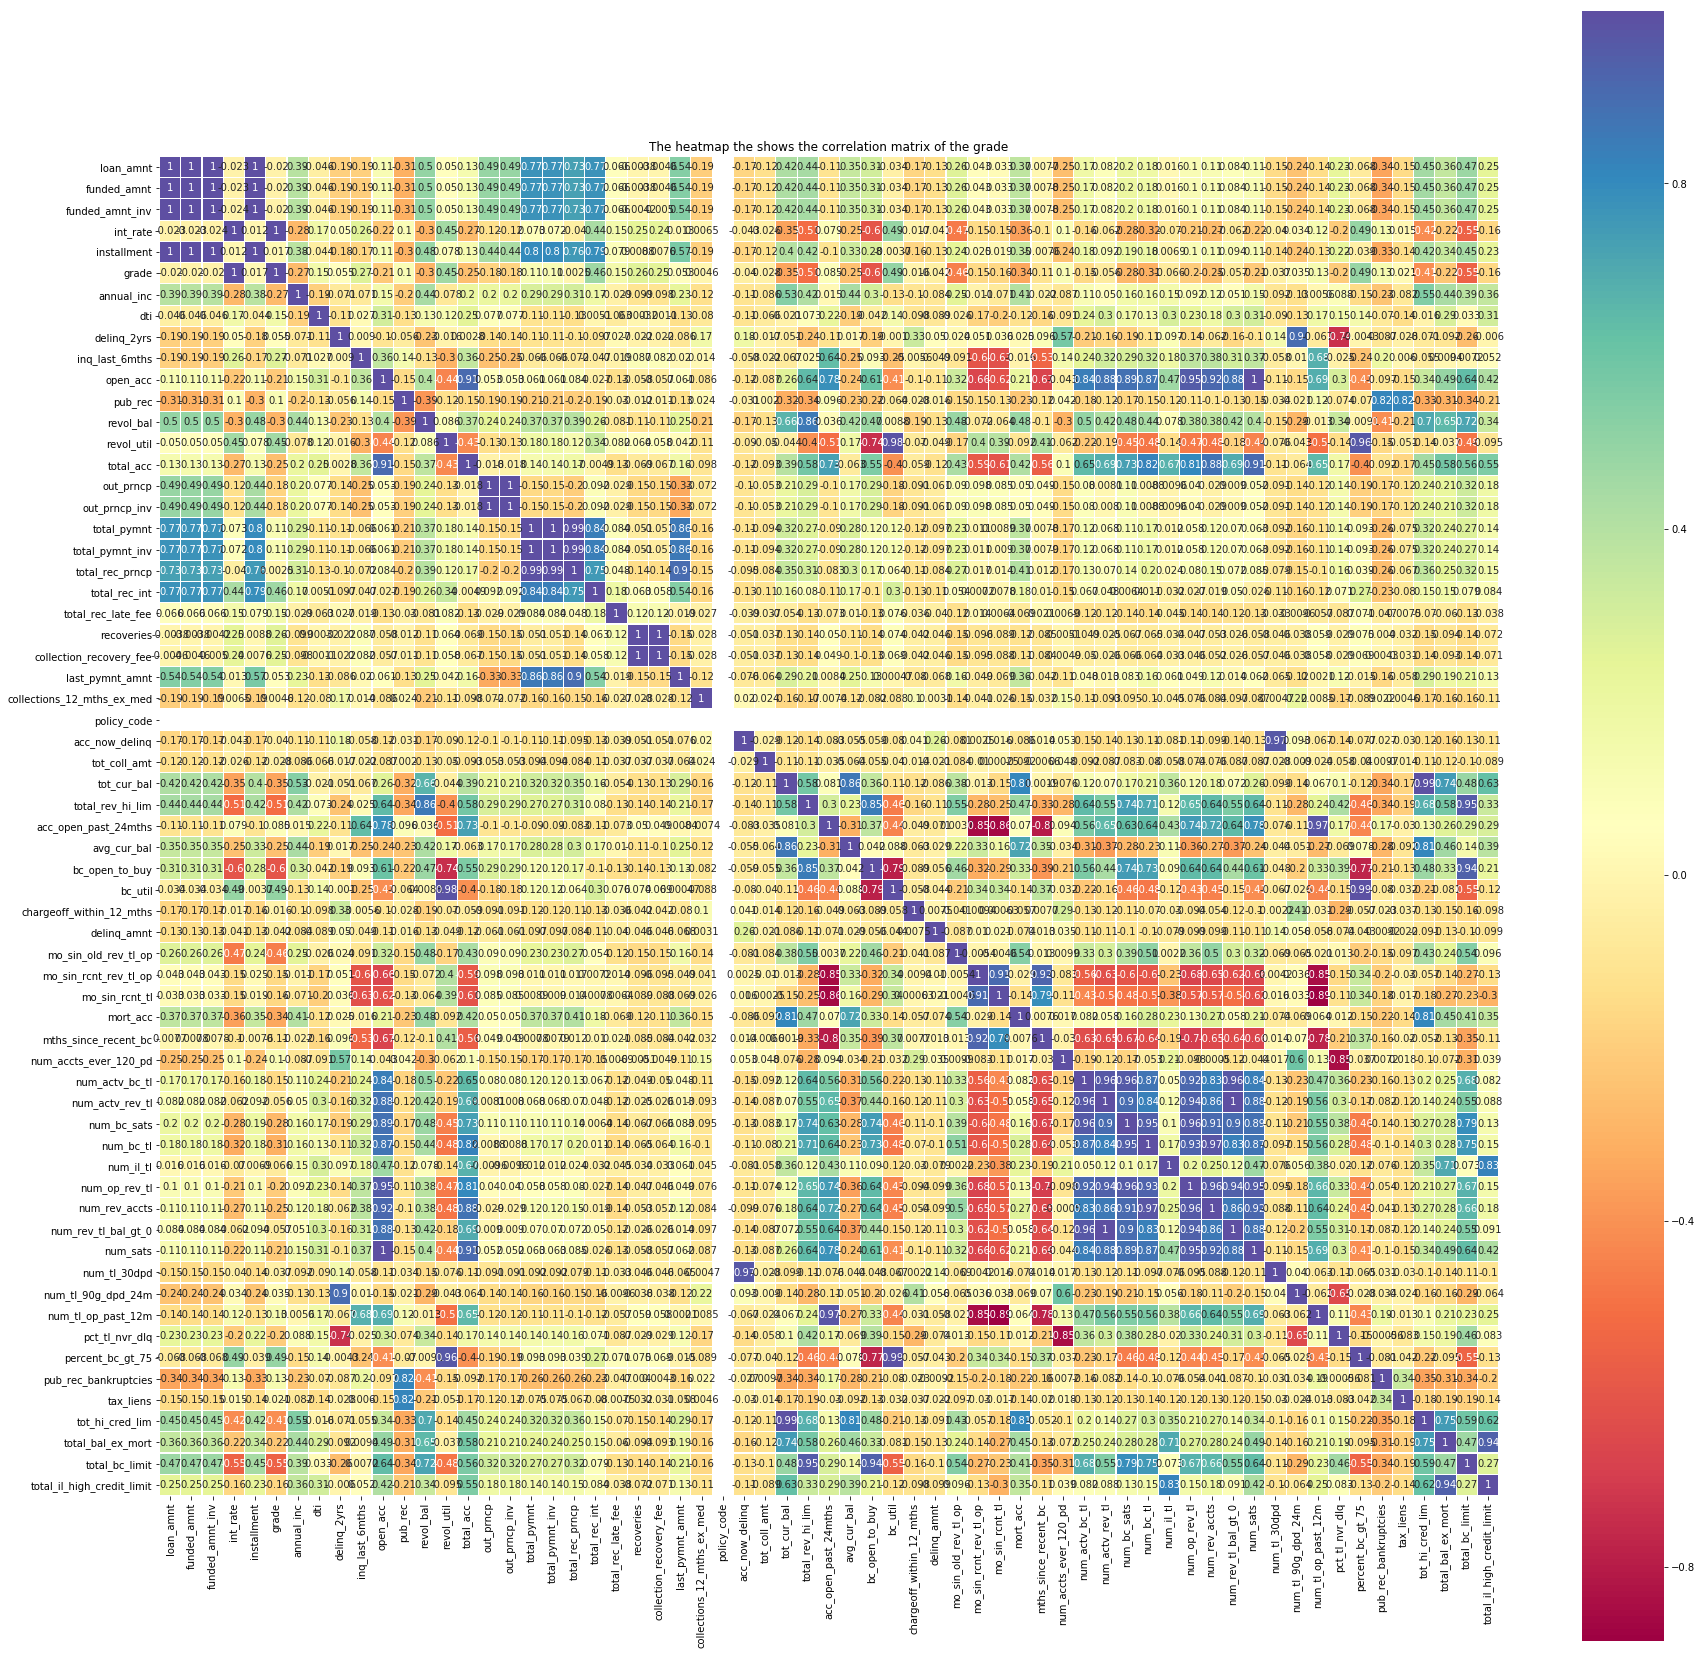

In [140]:
#Plot the correlation matrix of the new data.
plt.figure(figsize=(30, 30))
sns.heatmap(data_gr.corr(),linewidths=0.10,vmax=1.0,square=True,cmap="Spectral", linecolor='w',annot=True)
plt.title('The heatmap the shows the correlation matrix of the grade')
plt.show()

In [4]:
a = data_gr[data_gr.columns[1:]].corr()['grade'][:]
a = a.sort_values(ascending=False)[1:10]
a

int_rate                   0.996913
bc_util                    0.493824
percent_bc_gt_75           0.489807
total_rec_int              0.462304
revol_util                 0.454848
inq_last_6mths             0.268537
recoveries                 0.259770
collection_recovery_fee    0.249656
dti                        0.154220
Name: grade, dtype: float64

In [ ]:
"""It shows the correlations between grade and other variables, we can see the interest rate is the most correlation 
to loan grade which is upto 99.69% ,then bc_util,percent_bc_gt_75, total_rec_int, revol_util are the next correlation to grade loan"""


In [5]:
#get info to see the type then drop col with object type except loan grade , then drop all other category except grade
#data_new.info()
data_new1=data_new.drop(["term","sub_grade","home_ownership","title","verification_status","issue_d",'loan_status',
                         "pymnt_plan",'purpose','zip_code', 'addr_state' , 'earliest_cr_line' , 
                         'initial_list_status' ,'policy_code', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d',
                         'application_type','hardship_flag','disbursement_method','debt_settlement_flag'], axis=1)
data_new1.head()


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,2500,2500,2500.0,13.56,84.92,C,55000.0,18.24,0.0,1.0,...,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0
1,30000,30000,30000.0,18.94,777.23,D,90000.0,26.52,0.0,0.0,...,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0
2,5000,5000,5000.0,17.97,180.69,D,59280.0,10.51,0.0,0.0,...,0.0,0.0,100.0,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0
3,4000,4000,4000.0,18.94,146.51,D,92000.0,16.74,0.0,0.0,...,0.0,3.0,100.0,100.0,0.0,0.0,385183.0,36151.0,5000.0,44984.0
4,30000,30000,30000.0,16.14,731.78,C,57250.0,26.35,0.0,0.0,...,0.0,5.0,92.3,0.0,0.0,0.0,157548.0,29674.0,9300.0,32332.0


In [6]:
#get the dummy of grade and concat with the rest of col
data_cat=pd.concat([data_new1,data_new1['grade']], axis=1)
data_cat=pd.get_dummies(data_new1,columns= ['grade'],drop_first=True)
data_cat.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,2500,2500,2500.0,13.56,84.92,55000.0,18.24,0.0,1.0,9.0,...,60124.0,16901.0,36500.0,18124.0,0,1,0,0,0,0
1,30000,30000,30000.0,18.94,777.23,90000.0,26.52,0.0,0.0,13.0,...,372872.0,99468.0,15000.0,94072.0,0,0,1,0,0,0
2,5000,5000,5000.0,17.97,180.69,59280.0,10.51,0.0,0.0,8.0,...,136927.0,11749.0,13800.0,10000.0,0,0,1,0,0,0
3,4000,4000,4000.0,18.94,146.51,92000.0,16.74,0.0,0.0,10.0,...,385183.0,36151.0,5000.0,44984.0,0,0,1,0,0,0
4,30000,30000,30000.0,16.14,731.78,57250.0,26.35,0.0,0.0,12.0,...,157548.0,29674.0,9300.0,32332.0,0,1,0,0,0,0


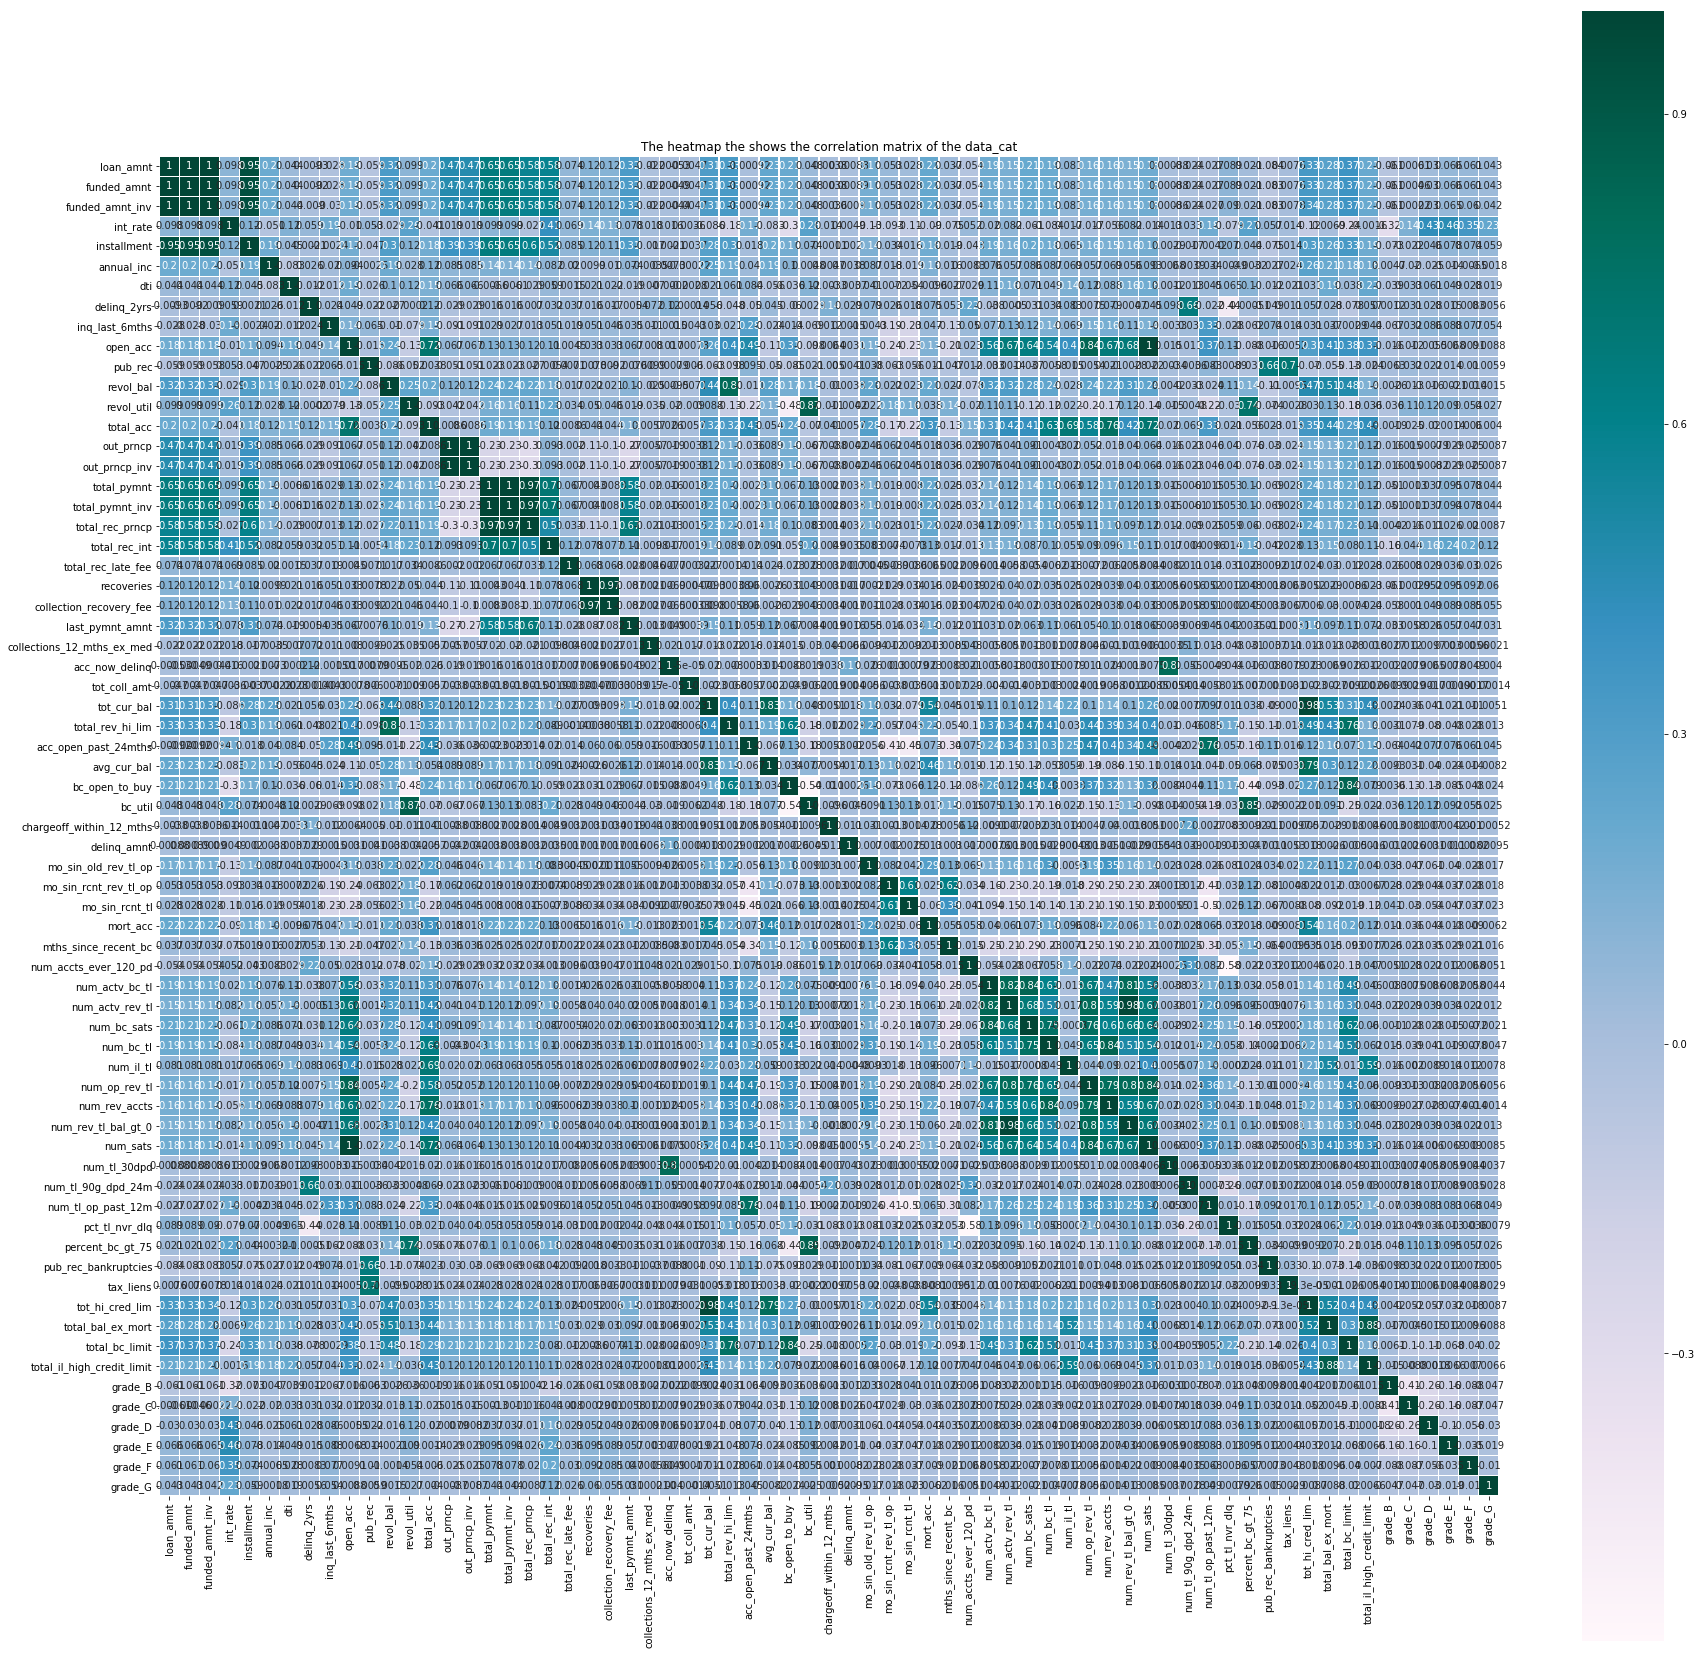

In [147]:
#Plot the correlation matrix of the new data.
plt.figure(figsize=(30, 30))
sns.heatmap(data_cat.corr(),linewidths=0.25,vmax=1.0,square=True,cmap="PuBuGn", linecolor='w',annot=True)
plt.title('The heatmap the shows the correlation matrix of the data_cat')
plt.show()

In [7]:
v = data_cat[data_cat.columns[1:]].corr()['int_rate'][:]
v.sort_values(ascending=False)[:10]

int_rate            1.000000
grade_E             0.456806
grade_D             0.427823
total_rec_int       0.411351
grade_F             0.351115
bc_util             0.277124
percent_bc_gt_75    0.271897
revol_util          0.262677
grade_G             0.228075
inq_last_6mths      0.188399
Name: int_rate, dtype: float64

In [76]:
"we can see that the Grade_E has the most correlation w int_rate"

'we can see that the Grade_E has the most correlation w int_rate'

In [69]:
# **FITTING LOGISTIC REGRESSION MODEL: 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#Assign var 
data_catno=data_cat.dropna()
data_catno_x = data_catno.loc[:, 'loan_amnt':]
data_catno_y = data_catno['grade_E']

In [70]:
#Predicting the Probability of A dependent variable (Y)
#Using the train_test_split function to split the testing and training data for X and Y dataframes
x_training, x_testing, y_training, y_testing = train_test_split(data_catno_x, data_catno_y, test_size = 0.2,random_state=0)
#Fit the logistic regression on the training and testing dataset of X and Y
log_model= LogisticRegression()
log_fit = log_model.fit(x_training.astype(int),y_training.astype(int))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [71]:
from sklearn.metrics import classification_report
#Using the predict() function to predict the y estimates based on the testing set of X
prediction_y = log_model.predict(x_testing.astype(int))
#Building a text report
print(classification_report(y_testing.astype(int), prediction_y.astype(int)))
print('The Logistic Regression Classifier on the testing set has the accuracy of : {:.2f}'.format(log_model.score(x_testing.astype(int), y_testing.astype(int))))


              precision    recall  f1-score   support

           0       0.94      0.99      0.97    406425
           1       0.39      0.10      0.15     26048

   micro avg       0.94      0.94      0.94    432473
   macro avg       0.67      0.54      0.56    432473
weighted avg       0.91      0.94      0.92    432473

The Logistic Regression Classifier on the testing set has the accuracy of : 0.94


In [72]:
#Evaluating the Accuracy of a Logistic Regression Classification Using Confusion Matrix
from sklearn.metrics import confusion_matrix
#Find the confusion matrix that evaluates the accuracy of the classification
confusion_matrix = confusion_matrix(y_testing.astype(int), prediction_y.astype(int))
confusion_matrix

array([[402563,   3862],
       [ 23540,   2508]])

In [29]:
"""Based on the Confussion Matrix obtained above, we can conclude that:
There are 402563 + 2508 = 405071 correct predictions and there are 3862 + 23540 = 27402 incorrect predictions using Logistic Regression classification."""

In [73]:
# Plot the ROC Curve of a Logistic Regression Classification Model:
from sklearn.metrics import roc_curve, roc_auc_score
#Computing false, true positive rates and the thresholds using roc_curve() function
fpr, tpr, thresholds = roc_curve(y_testing.astype(int), log_model.predict_proba(x_testing.astype(int))[:,1])
#Computing the Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
area_under_roc_auc = roc_auc_score(y_testing.astype(int), log_model.predict(x_testing.astype(int)))
print('The Area under the ROC AUC from the prediction scores is : ', area_under_roc_auc)

The Area under the ROC AUC from the prediction scores is :  0.5433907077865834


/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "top". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


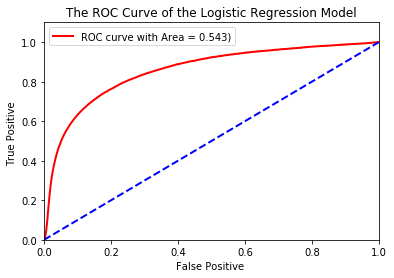

In [74]:
#Make the plot that shows the ROC curve of the logistic regression model
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve with Area = %0.3f)' % area_under_roc_auc)
plt.plot([0, 1], [0, 1],color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive ')
plt.ylabel('True Positive ')
plt.title('The ROC Curve of the Logistic Regression Model')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend(loc = 'top')
plt.show()

In [75]:
"""Based on the ROC Curve of the Logistic Regression model above:  
The blue line shows the ROC curve of a random classifier while a red line shows the ROC curve with the area under the ROC curve of the logistic model (Area = 0.5433907077865834). 
The further the ROC curve(red line) is from the blue line, the better the logistic regression model is.
"""

'Based on the ROC Curve of the Logistic Regression model above:  \nThe blue line shows the ROC curve of a random classifier while a red line shows the ROC curve with the area under the ROC curve of the logistic model (Area = 0.5433907077865834). \nThe further the ROC curve(red line) is from the blue line, the better the logistic regression model is.\n'